# DUI Analysis in the San Diego Area

In [2]:
# Import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
from geopy.geocoders import Nominatim
from geopy.distance import vincenty



# Cleaning DUI Arrests Data (2007-2013)

The datafile 'incidents-100k.csv'shows all the police incidents in the San Diego area from 2007-2013. It conatins type of incident, date, and location. We will use this data to identify number of DUI arrests in the San Diego area.

link:
http://data.sandiegodata.org/de/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract

In [3]:
# Pull the comprehensive police reported incidents file, dated from 2007 to 2013.
incidents7_13 = pd.read_csv('incidents-100k.csv')
incidents7_13.head(13)

,id,date,year,month,day,week,dow,time,hour,is_night,...,comm_pop,council,coun_pop,asr_zone,lampdist,lat,lon,desc,gctype,gcquality
0,NaN,9/19/08,2008,9,3184,37,5,13:00:00,13,0,...,42779,San005,143957,1,3162,32.957337,-117.143777,ILLEGAL POSSESS TEAR GAS/ETC,cns/segment,54
1,NaN,7/20/08,2008,7,3123,28,0,22:00:00,22,1,...,15748,San003,147116,3,8000,32.758153,-117.125022,FRAUD,cns/segment,65
2,NaN,5/25/09,2009,5,3432,21,1,0:30:00,0,1,...,39849,San002,142456,6,2236,32.796761,-117.254577,BATTERY WITH SERIOUS BODILY INJURY,cns/segment,65
3,NaN,4/22/11,2011,4,4129,16,5,19:10:00,19,0,...,45697,San003,147116,6,1414,32.757287,-117.129870,POSSESS NARCOTIC CONTROLLED SUBSTANCE,cns/segment,65
4,NaN,5/12/12,2012,5,4515,19,6,21:40:00,21,1,...,77873,San006,140738,1,6082,32.836098,-117.206645,BATTERY WITH SERIOUS BODILY INJURY (F),cns/segment,65
5,NaN,12/21/10,2010,12,4007,51,2,13:35:00,13,0,...,77873,San006,140738,7,9899,32.820347,-117.182419,COMMERCIAL ROBBERY - WEAPON USED,cns/segment,65
6,NaN,9/23/09,2009,9,3553,38,3,23:55:00,23,1,...,31759,San003,147116,1,1414,32.707287,-117.158730,PROSTITUTION,cns/segment,65
7,NaN,10/12/08,2008,10,3207,40,0,21:00:00,21,1,...,77873,San006,140738,1,12000,32.836803,-117.208681,RESIDENTIAL BURGLARY,cns/segment,65
8,NaN,6/6/08,2008,6,3079,22,5,19:00:00,19,0,...,18947,San007,147442,6,4000,32.774932,-117.144025,VEHICLE BREAK-IN/THEFT,cns/segment,65
9,NaN,3/20/07,2007,3,2635,12,2,10:55:00,10,0,...,13816,San009,145045,6,2236,32.755078,-117.099457,DISORDERLY CONDUCT: ALCOHOL,cns/segment,65


In [4]:
#we want info on just DUI incidents
dui_incidents7_13 = incidents7_13[incidents7_13['type']=='DUI']
dui_incidents7_13

,id,date,year,month,day,week,dow,time,hour,is_night,...,comm_pop,council,coun_pop,asr_zone,lampdist,lat,lon,desc,gctype,gcquality
26,NaN,2/16/09,2009,2,3334,7,1,3:10:00,3,1,...,15461,San003,147116,2,1414,32.727536,-117.126406,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
33,NaN,6/15/07,2007,6,2722,24,5,0:42:00,0,1,...,47361,San004,142911,4,2236,32.711458,-117.100046,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
40,NaN,6/22/12,2012,6,4556,25,5,0:12:00,0,1,...,37279,San003,147116,3,9055,32.760025,-117.147536,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
52,NaN,1/8/12,2012,1,4390,1,0,5:40:00,5,1,...,74062,San009,145045,4,5000,32.735889,-117.092596,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
75,NaN,4/16/11,2011,4,4123,15,6,2:33:00,2,1,...,47361,San004,142911,0,2236,32.700446,-117.091818,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
93,NaN,7/6/10,2010,7,3839,27,2,0:13:00,0,1,...,6597,San001,147305,9,2236,32.930747,-117.245106,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
97,NaN,6/2/08,2008,6,3075,22,1,1:07:00,1,1,...,37348,San009,145045,6,1000,32.767314,-117.056453,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
102,NaN,7/30/10,2010,7,3863,30,5,0:31:00,0,1,...,6597,San001,147305,1,3000,32.949115,-117.257597,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
123,NaN,3/18/11,2011,3,4094,11,5,0:51:00,0,1,...,39849,San002,142456,3,1414,32.797726,-117.242200,DUI ALCOHOL AND/OR DRUGS,cns/segment,65
146,NaN,10/30/07,2007,10,2859,44,2,1:47:00,1,1,...,37279,San003,147116,6,3162,32.724059,-117.163424,DUI ALCOHOL AND/OR DRUGS,cns/segment,65


In [5]:
#lets get only the data we would potentially use
dui_incidents7_13 = dui_incidents7_13[['year','month','comm_pop','address','lon','lat']]
dui_incidents7_13

,year,month,comm_pop,address,lon,lat
26,2009,2,15461,3100 Block Hawthorn Street,-117.126406,32.727536
33,2007,6,47361,4400 Block Market Street,-117.100046,32.711458
40,2012,6,37279,4500 Block North Avenue,-117.147536,32.760025
52,2012,1,74062,4700 Block Home Avenue,-117.092596,32.735889
75,2011,4,47361,4800 Block Ocean View Hills Parkway,-117.091818,32.700446
93,2010,7,6597,2700 Block Carmel Valley Road,-117.245106,32.930747
97,2008,6,37348,6600 Block El Cajon Boulevard,-117.056453,32.767314
102,2010,7,6597,2200 Block Del Mar Heights Road,-117.257597,32.949115
123,2011,3,39849,4400 Block Haines Street,-117.242200,32.797726
146,2007,10,37279,100 Block Elm Street,-117.163424,32.724059


# Cleaning DUI Crashes Data (2015-2017)

In [17]:
crashes15_17 = pd.read_csv('pd_collisions_datasd.csv')
crashes15_17.head(5)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,500002,1/1/15 0:01,627,3700,,VERMONT,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
1,500098,1/1/15 0:01,725,6000,,VISTA SAN ISIDRO,,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
2,500436,1/1/15 1:35,712,100,E,SAN YSIDRO,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN
3,500166,1/1/15 2:00,438,2600,,RACHEL,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
4,500429,1/1/15 2:30,813,4600,,30TH,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,MISDEMEANOR


In [18]:
#we want info on just DUI incidents
dui_crashes15_17 = crashes15_17[crashes15_17['charge_desc']=='DUI ALCOHOL AND/OR DRUGS']
dui_crashes15_17.head(5)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
12,500207,1/1/15 7:58,122,800,,TURQUOISE,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
242,500338,1/9/15 21:46,242,8400,,WESTMORE,ROAD,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
506,500572,1/19/15 14:30,517,3000,,C,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,MISDEMEANOR
652,500680,1/24/15 22:35,451,3400,,COLLEGE,AVENUE,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
689,500745,1/26/15 8:32,521,1600,,C,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN


In [20]:
#lets get only the data we would potentially use
dui_crashes15_17 = dui_crashes15_17[['date_time','street_no','street_name','street_type','charge_desc']]
dui_crashes15_17

,date_time,street_no,street_name,street_type,charge_desc
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS
808,1/30/15 22:26,300,DEEP DELL,ROAD,DUI ALCOHOL AND/OR DRUGS
871,2/1/15 19:27,3900,WABASH,AVENUE,DUI ALCOHOL AND/OR DRUGS
965,2/4/15 19:19,400,26TH,STREET,DUI ALCOHOL AND/OR DRUGS
1682,3/1/15 15:20,3900,05TH,AVENUE,DUI ALCOHOL AND/OR DRUGS
1947,3/10/15 7:34,4400,52ND,STREET,DUI ALCOHOL AND/OR DRUGS


In [42]:
#all of the addresses are separated, lets combine them into a single string
address = pd.Series(np.zeros(len(dui_crashes15_17)))
for i in range(0, len(dui_crashes15_17)):
    address[i] = (str(dui_crashes15_17['street_no'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_name'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_type'].iloc[i]))
#address
dui_crashes15_17 = dui_crashes15_17.assign(address = address.values)
dui_crashes15_17
#Now we got a single string as address

,date_time,street_no,street_name,street_type,charge_desc,address
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS,800 TURQUOISE STREET
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS,8400 WESTMORE ROAD
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS,3000 C STREET
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS,3400 COLLEGE AVENUE
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS,1600 C STREET
808,1/30/15 22:26,300,DEEP DELL,ROAD,DUI ALCOHOL AND/OR DRUGS,300 DEEP DELL ROAD
871,2/1/15 19:27,3900,WABASH,AVENUE,DUI ALCOHOL AND/OR DRUGS,3900 WABASH AVENUE
965,2/4/15 19:19,400,26TH,STREET,DUI ALCOHOL AND/OR DRUGS,400 26TH STREET
1682,3/1/15 15:20,3900,05TH,AVENUE,DUI ALCOHOL AND/OR DRUGS,3900 05TH AVENUE
1947,3/10/15 7:34,4400,52ND,STREET,DUI ALCOHOL AND/OR DRUGS,4400 52ND STREET


In [ ]:
#Next we should use geocoding to get lon/lat of the addresses

# Cleaning Alchohol Permits Data

In [44]:
alc_permits = pd.read_csv('abs-licenses-casnd.csv')
alc_permits.head(13)

,last_date,OGC_FID,GEOMETRY,licenses_id,scrape_date,licenseno,status,licensetype,issuedate,exprdate,...,y,city,neighborhood,community,council,tract,business,mailaddress,gcquality,gctype
0,2013-07-09T,1,NaN,NaN,2013-07-09T,413,ACTIVE,51,1951-07-20T,2014-03-31T,...,1864266.244,NONE,NONE,NONE,NONE,76,NaN,NaN,0,cns/address
1,2013-07-09T,2,NaN,NaN,2013-07-09T,1414,ACTIVE,41,1978-06-05T,2014-04-30T,...,1914460.918,SndSAN,NONE,NONE,NONE,83.59,Capriccio Italian Restaurant,NaN,0,cns/address
2,2013-07-09T,3,NaN,NaN,2013-07-09T,1419,ACTIVE,21,1964-08-18T,2013-09-30T,...,1836127.888,SndCHU,NONE,NONE,NONE,35.01,Ocean View Liquor,NaN,0,cns/address
3,2013-07-09T,4,NaN,NaN,2013-07-09T,2498,ACTIVE,21,1978-01-01T,2013-08-31T,...,1853601.895,SndOCN,NONE,NONE,NONE,24.01,Market Place The,NaN,0,cns/address
4,2013-07-09T,5,NaN,NaN,2013-07-09T,3803,ACTIVE,48,1977-05-18T,2014-03-31T,...,1872475.613,SndPOW,NONE,NONE,NONE,79.08,Silver Fox Associates Inc,NaN,0,cns/address
5,2013-07-09T,6,NaN,NaN,2013-07-09T,4016,ACTIVE,21,1971-06-17T,2013-06-30T,...,1868131.155,SndCAR,NONE,NONE,NONE,77.02,Crest,NaN,0,cns/address
6,2013-07-09T,7,NaN,NaN,2013-07-09T,4261,ACTIVE,21,1979-08-20T,2014-01-31T,...,1839817.217,SndESC,NONE,NONE,NONE,34.03,NaN,NaN,0,cns/address
7,2013-07-09T,8,NaN,NaN,2013-07-09T,5332,ACTIVE,21,1973-01-22T,2014-02-28T,...,1817985.404,SndSNM,NONE,NONE,NONE,219,One Ten Liquor & Market,NaN,19,cns/seginterp
8,2013-07-09T,9,NaN,NaN,2013-07-09T,6278,ACTIVE,47,1977-07-01T,2013-08-31T,...,-1.000,SndENC,NONE,NONE,NONE,172,NaN,"7889 OSTROW ST SAN DIEGO, CA 92111-3602",-1,NONE
9,2013-07-09T,10,NaN,NaN,2013-07-09T,6555,ACTIVE,51,1967-07-01T,2014-05-31T,...,1836126.145,SndVIS,NONE,NONE,NONE,35.01,Fra Club 62,NaN,0,cns/address


# Visualising Our Data

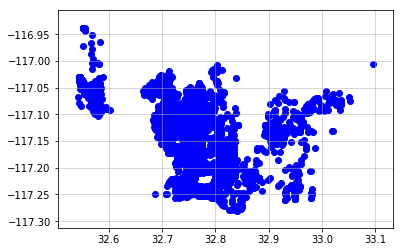

In [7]:
#DUI Arrests SCATTER PLOTTING

coords = np.zeros(len(dui_incidents7_13), dtype=('2float'))

for i in range(0, len(dui_incidents7_13)):
    dui_lat = float(dui_incidents7_13['lat'].iloc[i])
    dui_lng = float(dui_incidents7_13['lon'].iloc[i])
    coords[i] = (dui_lat, dui_lng)

plt.scatter(coords[:,0], coords[:,1], c='blue')
# Turn on the grid
plt.grid(linewidth='0.5')
plt.show()



In [8]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2, whiten

Length of dui_incidents7_13 dataframe:  4917
Centroids:  [[  418.59044599 -1849.08599731]
 [  416.38886941 -1847.65217535]
 [  419.68626467 -1850.39104125]]


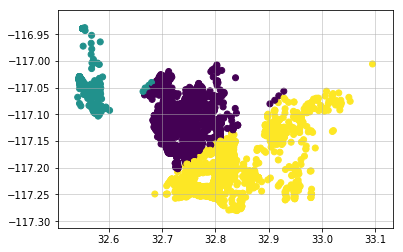

In [9]:
# 1. DUI CLUSTERING
# K-means clustering of hottest parking meters
# Determine whether bus and meter clusters have similar epicenters

# First cluster DUI arrests coordinates.
#coords = np.zeros(len(dui_incidents7_13), dtype=('2float'))

#for i in range(0, len(dui_incidents7_13)):
#    dui_lat = float(dui_incidents7_13['lat'].iloc[i])
#    dui_lng = float(dui_incidents7_13['lon'].iloc[i])
#    coords[i] = (dui_lat, dui_lng)

print("Length of dui_incidents7_13 dataframe: ",len(coords))

x, y = kmeans2(whiten(coords), 3, iter = 20)  
print("Centroids: ",x)

plt.scatter(coords[:,0], coords[:,1], c=y);
plt.grid(linewidth='0.5')
plt.show()

